In [2]:
# code for making a caterpillar plot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/home/dices/Research/GWlensing_Brian/src_pos_with_z_sigma.csv')


#print(dz)
# add the dz column to the dataframe

# calculate dA by dxdy
dx = abs(data['x'] - data['localized_x'])
dy = abs(data['y'] - data['localized_y'])
dz=abs(data['z']-data['localized_z'])

data['dx'] = dx.round(12)
data['dy'] = dy.round(12)
data['dz'] = dz.round(12)
#data['dS'] = np.sqrt(dx**2 + dy**2).round(12)
# Print the dataframe with 12 decimal places
print(data)
# save the dataframe in original file
#data.to_csv('/home/dices/Research/GWlensing_Brian/src_pos_with_z_sigma.csv', index=False)

    indices       x      y     z  localized_index  localized_x  sigma_x_po  \
0       2.0  110.90  88.70  3.10              2.0   110.200000        1.90   
1       4.0   80.10  99.90  3.30              4.0    79.020000        2.05   
2       3.0   72.40  57.20  2.90              5.0    77.330000        1.50   
3       3.0   71.30  56.90  3.44              3.0    71.240000        0.46   
4       1.0   70.00  75.00  3.12              1.0    68.510000        1.54   
5       0.0   81.60  72.00  2.60              0.0    81.800000        0.36   
6       2.0  110.00  88.60  3.54              2.0   109.980000        1.90   
7       5.0   77.60  67.50  3.34              5.0    77.310000        0.79   
8       4.0   77.88  98.53  3.54              4.0    78.107373        1.99   
9       1.0   67.50  81.00  3.00              1.0    67.551018        4.47   
10      3.0   56.00  71.30  3.60              3.0    72.602900        0.44   
11      2.0  106.50  84.60  3.14              2.0   105.980000  

In [6]:
data_zH0 = pd.read_csv('/home/dices/Research/GWlensing_Brian/src_pos_for_dist_with_z_H0_de+mcmc.csv')


#print(dz)
# add the dz column to the dataframe
data_zH0['dz'] = dz.round(12)
# calculate dA by dxdy
dx = abs(data_zH0['x'] - data_zH0['localized_x'])
dy = abs(data_zH0['y'] - data_zH0['localized_y'])
dz = abs(data_zH0['z']-data_zH0['localized_z'])
dH0 = abs(data_zH0['H0'] - data_zH0['localized_H0'])

data_zH0['dx'] = dx.round(12)
data_zH0['dy'] = dy.round(12)
data_zH0['dS'] = np.sqrt(dx**2 + dy**2).round(12)
data_zH0['dz'] = dz.round(12)
data_zH0['dH0'] = dH0.round(12)
# Print the dataframe with 12 decimal places
print(data_zH0)
# save the dataframe in original file
#data.to_csv('/home/dices/Research/GWlensing_Brian/src_pos_for_dist_with_z_de+mcmc.csv', index=False)

    indices           x          y     z    H0  localized_index  localized_x  \
0       2.0  110.900000  88.700000  3.10  70.0              2.0   109.123319   
1       4.0   80.100000  99.900000  3.30  65.0              4.0    80.178261   
2       3.0   72.400000  57.200000  2.90  73.0              3.0    72.372211   
3       3.0   71.300000  56.900000  3.44  79.5              3.0    71.395537   
4       5.0   75.400000  69.200000  3.40  66.0              5.0    75.417404   
5       1.0   70.000000  75.000000  3.12  74.1              1.0    70.007946   
6       4.0   80.020000  99.700000  3.12  80.3              4.0    79.995248   
7       2.0  107.000000  89.000000  2.65  66.0              2.0   107.010063   
8       3.0   56.000000  71.300000  3.60  78.0              3.0    72.602496   
9       0.0   82.400000  75.600000  2.72  78.0              0.0    82.520000   
10      5.0   77.600000  67.500000  3.34  82.0              5.0    77.559356   
11      2.0  110.000000  88.600000  3.54

In [36]:
# real data for known H0
data_z_sigma = pd.read_csv('/home/dices/Research/GWlensing_Brian/src_pos_with_z_sigma.csv')
events_2 = np.arange(1, 16)

# real data for known H0
x_med   = data_z_sigma['localized_x']
x_lo    = data_z_sigma['sigma_x_ne']
x_hi    = data_z_sigma['sigma_x_po']
x_err   = np.vstack([x_lo, x_hi])

# y [arcsec]
y_med   = data_z_sigma['localized_y']
y_lo    = data_z_sigma['sigma_y_ne']
y_hi    = data_z_sigma['sigma_y_po']
y_err   = np.vstack([y_lo, y_hi])

# z_s
z_med   = data_z_sigma['localized_z']
z_lo    = data_z_sigma['sigma_z_ne']
z_hi    = data_z_sigma['sigma_z_po']
z_err   = np.vstack([z_lo, z_hi])

# corresponding “truth – median” offsets
dx = data_z_sigma['dx']
dy = data_z_sigma['dy']
dz = data_z_sigma['dz']



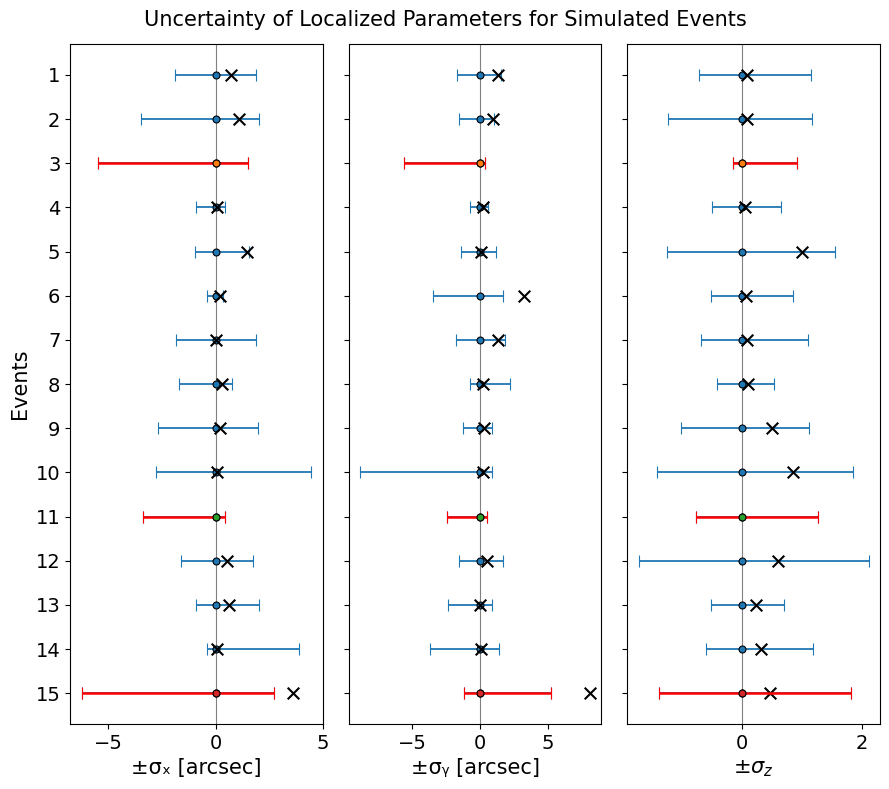

In [46]:

plt.rcParams.update({'axes.labelsize': 15, 'ytick.labelsize': 12})

def _width_only(ax, err, truth, label, first=False, skip_truth_events=None):
    """Caterpillar whiskers + optional truth stars."""
    ax.errorbar(
        x=np.zeros(err.shape[1]), y=events_2,
        xerr=err, fmt='o',
        ecolor='tab:blue', elinewidth=1.3, capsize=4,
        mec='k', mew=0.8, ms=5
    )

    # truth markers (★) – show for all events except those in skip_truth_events
    if skip_truth_events is None:
        skip_truth_events = set()
    for i, t in enumerate(truth, start=1):        # events are 1‑based here
        if i in skip_truth_events:
            continue
        ax.scatter(t, i, marker='x', s=70, color='k', zorder=3)

    ax.axvline(0, color='grey', lw=.8)
    ax.set_xlabel(label)
    ax.invert_yaxis()
    ax.set_yticks(events_2)
    ax.tick_params(labelsize=14)
    if first:
        ax.set_ylabel('Events')

# ---------------------------------------------------------------------------------
#  FIGURE LAYOUT
# ---------------------------------------------------------------------------------
fig, ax = plt.subplots(1, 3, figsize=(9, 8), sharey=True)
fig.suptitle('Uncertainty of Localized Parameters for Simulated Events', fontsize=15)

skip_stars = {3, 11}          # events WITHOUT ★
_width_only(ax[0], x_err, dx, '±σₓ [arcsec]', first=True, skip_truth_events=skip_stars)
_width_only(ax[1], y_err, dy, '±σᵧ [arcsec]',                 skip_truth_events=skip_stars)
_width_only(ax[2], z_err, dz, '$\\pm σ_z$',                  skip_truth_events=skip_stars)

# ---------------------------------------------------------------------------------
#  HIGHLIGHT EVENTS 3, 11, 15 WITH RED WHISKERS
# ---------------------------------------------------------------------------------
highlight_events = [3, 11, 15]              # 1‑based labels to highlight
highlight_idx    = [e - 1 for e in highlight_events]   # convert to zero‑based indices

for a, e_arr in zip(ax, [x_err, y_err, z_err]):
    for idx in highlight_idx:
        a.errorbar(
            x=0, y=events_2[idx],
            xerr=[[e_arr[0, idx]], [e_arr[1, idx]]],
            fmt='o',
            ecolor='red', elinewidth=1.8, capsize=4,
            mec='k', mew=0.8, ms=5, zorder=5       # zorder> underlying blue whisker
        )

plt.tight_layout()
plt.savefig('Report images sem2/new/caterpillar_plot_z.pdf')
plt.show()

In [ ]:
# sample data
rng = np.random.default_rng(seed=12)

# event labels 1‒15
events_2 = np.arange(1, 16)

# x [arcsec]
x_med_2      = rng.normal( 0.00, 0.40, 15).round(3)      # medians
x_sigma_lo_2    = rng.uniform(0.10, 0.25, 15).round(3)
x_sigma_hi_2    = rng.uniform(0.15, 0.35, 15).round(3)
x_err_2      = np.vstack([x_sigma_lo_2, x_sigma_hi_2])             # ±σ for Matplotlib

# y [arcsec]
y_med_2      = rng.normal(-0.10, 0.35, 15).round(3)
y_sigma_lo_2    = rng.uniform(0.10, 0.30, 15).round(3)
y_sigma_hi_2    = rng.uniform(0.10, 0.25, 15).round(3)
y_err_2      = np.vstack([y_sigma_lo_2, y_sigma_hi_2])             # symmetric ±σ

# z_s (source redshift)
z_med_2     = rng.normal(2.50, 0.30, 15).round(3)
z_err_lo_2   = rng.uniform(0.15, 0.30, 15).round(3)      # 16th percentile → median
z_err_hi_2   = rng.uniform(0.20, 0.45, 15).round(3)      # median → 84th percentile
z_err_2      = np.vstack([z_err_lo_2, z_err_hi_2])           # asymmetric errors

# H_0 (km/s/Mpc)
H0_med_2      = rng.normal(70, 2, 15).round(3)
H0_sigma_lo_2    = rng.uniform(1, 2, 15).round(3)
H0_sigma_hi_2    = rng.uniform(2, 3, 15).round(3)
H0_err_2      = np.vstack([H0_sigma_lo_2, H0_sigma_hi_2])             # ±σ for Matplotlib


In [16]:
# real data for unknown H0
data_zH0_sigma = pd.read_csv('/home/dices/Research/GWlensing_Brian/src_pos_with_z_H0_sigma.csv')
events_2 = np.arange(1, 16)

# x [arcsec]
x_med_2      = data_zH0_sigma['localized_x']      # medians
x_sigma_lo_2    = data_zH0_sigma['sigma_x_ne']
x_sigma_hi_2    = data_zH0_sigma['sigma_x_po']
x_err_2      = np.vstack([x_sigma_lo_2, x_sigma_hi_2])             # ±σ for Matplotlib

# y [arcsec]
y_med_2      = data_zH0_sigma['localized_y']
y_sigma_lo_2    = data_zH0_sigma['sigma_y_ne']
y_sigma_hi_2    =  data_zH0_sigma['sigma_y_po']
y_err_2      = np.vstack([y_sigma_lo_2, y_sigma_hi_2])             # symmetric ±σ

# z_s (source redshift)
z_med_2     = data_zH0_sigma['localized_z']
z_err_lo_2   = data_zH0_sigma['sigma_z_ne']
z_err_hi_2   = data_zH0_sigma['sigma_z_po'] 
z_err_2      = np.vstack([z_err_lo_2, z_err_hi_2])           # asymmetric errors

# H_0 (km/s/Mpc)
H0_med_2      = data_zH0_sigma['localized_H0']
H0_sigma_lo_2    = data_zH0_sigma['sigma_H0_ne']
H0_sigma_hi_2    = data_zH0_sigma['sigma_H0_po']
H0_err_2      = np.vstack([H0_sigma_lo_2, H0_sigma_hi_2])             # ±σ for Matplotlib

dx_2 = data_zH0_sigma['dx']
dy_2 = data_zH0_sigma['dy']
dz_2 = data_zH0_sigma['dz']
dH0_2 = data_zH0_sigma['dH0']


<>:51: SyntaxWarning: invalid escape sequence '\p'
<>:51: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_170175/1611202549.py:51: SyntaxWarning: invalid escape sequence '\p'
  _width_only(ax[2], z_err_2,  dz_2,  '$\pm σ_z$',                  skip_truth_event=9)


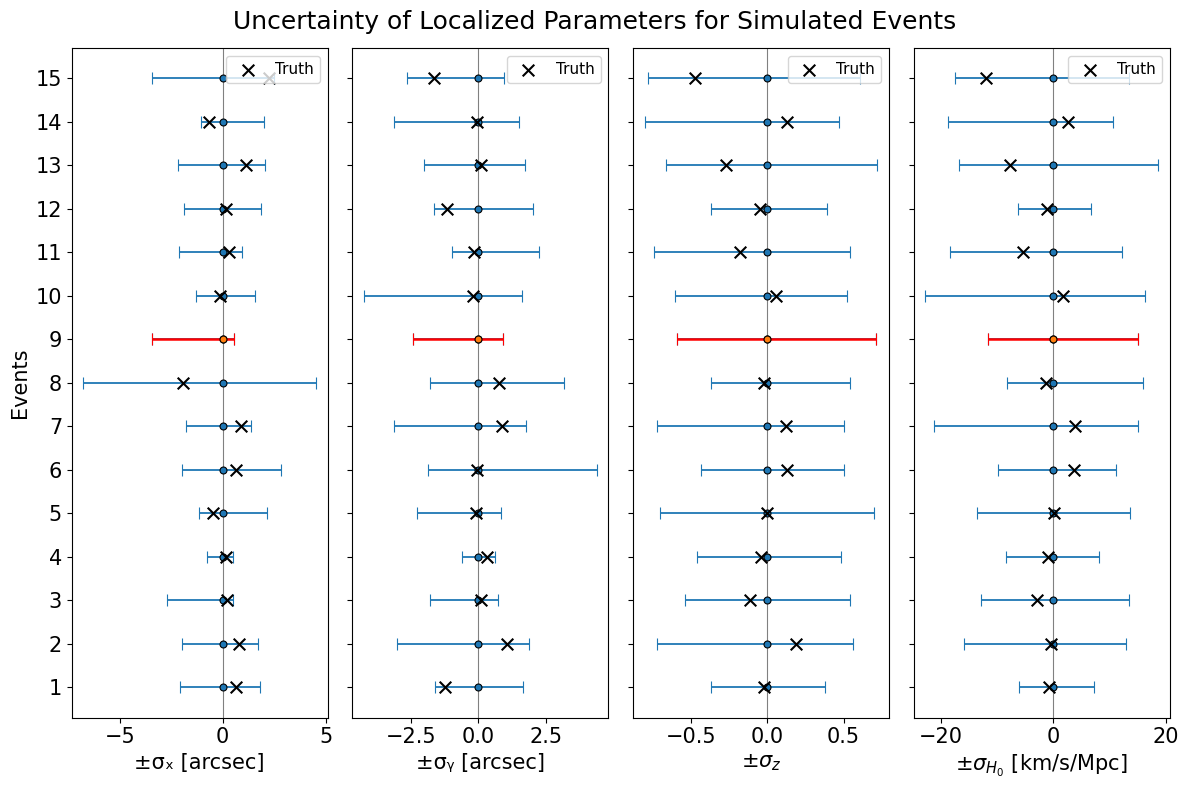

In [33]:
import matplotlib.ticker as mtick
plt.rcParams.update({'axes.labelsize': 15, 'ytick.labelsize': 12})

# fig, ax = plt.subplots(1, 3, figsize=(10, 6), sharey=True)
# fig.suptitle('Caterpillar plots for 15 lensed‑GW events', fontsize=16)

# def _caterpillar(ax, centre, err, xlabel):
#     ax.errorbar(centre, events, xerr=err, fmt='o', capsize=4,
#                 elinewidth=1.3, mec='k', mew=0.8, ms=5)
#     ax.set_xlabel(xlabel)
#     ax.axvline(0, color='grey', lw=.8, ls='--')     # optional reference
#     ax.invert_yaxis()                               # event 1 at the top
#     ax.set_yticks(events)

# _caterpillar(ax[0], x_med, x_err, r'$x$ [arcsec]')
# _caterpillar(ax[1], y_med, y_err, r'$y$ [arcsec]')
# _caterpillar(ax[2], z_med, z_err, r'$z_s$')

# plt.tight_layout()
# plt.show()

fig, ax = plt.subplots(1, 4, figsize=(12, 8), sharey=True)
fig.suptitle('Uncertainty of Localized Parameters for Simulated Events', fontsize=18)

def _width_only(ax, err, truth, label, first=False, skip_truth_event=None):
    ax.errorbar(                     # caterpillar whiskers
        x=np.zeros(err.shape[1]), y=events_2,
        xerr=err, fmt='o',
        ecolor='tab:blue', elinewidth=1.3, capsize=4,
        mec='k', mew=0.8, ms=5)
    
    # truth markers (★) – skip the chosen event
    for i, t in enumerate(truth, start=1):
        if i == skip_truth_event:
            continue
        ax.scatter(t, i, marker='x', s=70, color='k', zorder=3, label='Truth' if i == 1 else None)
    
    ax.axvline(0, color='grey', lw=.8)
    ax.set_xlabel(label)
    ax.invert_yaxis()
    ax.set_yticks(events_2)
    ax.tick_params(labelsize=15)
    if first:
        ax.set_ylabel('Events')
    ax.legend(loc='upper right', fontsize=11)
    
    
# ---- plotting ----
_width_only(ax[0], x_err_2,  dx_2,  '±σₓ [arcsec]', first=True, skip_truth_event=9)
_width_only(ax[1], y_err_2,  dy_2,  '±σᵧ [arcsec]',                 skip_truth_event=9)
_width_only(ax[2], z_err_2,  dz_2,  '$\pm σ_z$',                  skip_truth_event=9)
_width_only(ax[3], H0_err_2, dH0_2, r'$\pm σ_{H_0}$ [km/s/Mpc]',  skip_truth_event=9)

# --- highlight event 9 whisker in red (unchanged) ---
highlight_idx = 8  # zero‑based → event 9
for a, e in zip(ax, [x_err_2, y_err_2, z_err_2, H0_err_2]):
    a.errorbar(
        x=0, y=events_2[highlight_idx],
        xerr=[[e[0, highlight_idx]], [e[1, highlight_idx]]],
        fmt='o',
        ecolor='red', elinewidth=1.8, capsize=4,
        mec='k', mew=0.8, ms=5, zorder=5
    )

plt.tight_layout()
plt.savefig('/home/dices/Research/GWlensing_Brian/Report images sem2/new/caterpillar_plot_zH0.pdf')
plt.show()